Found 7370 images belonging to 2 classes.
Found 3630 images belonging to 2 classes.


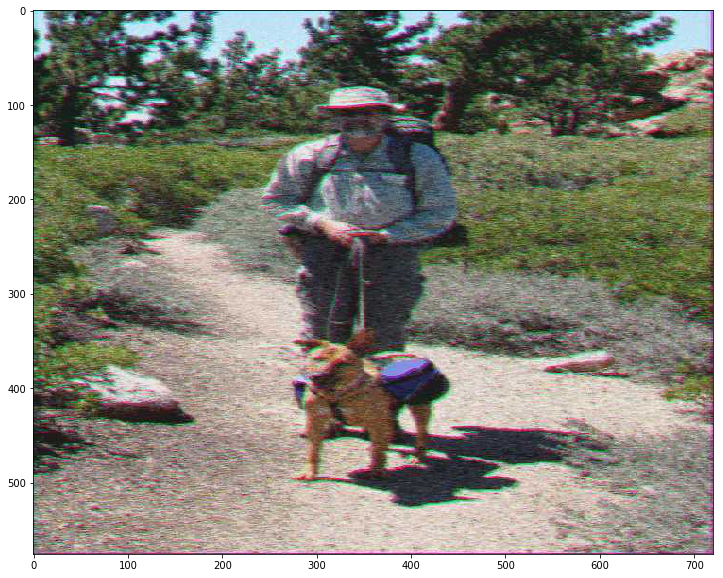

label : 1.0 (0 is clean and 1 is degraded)


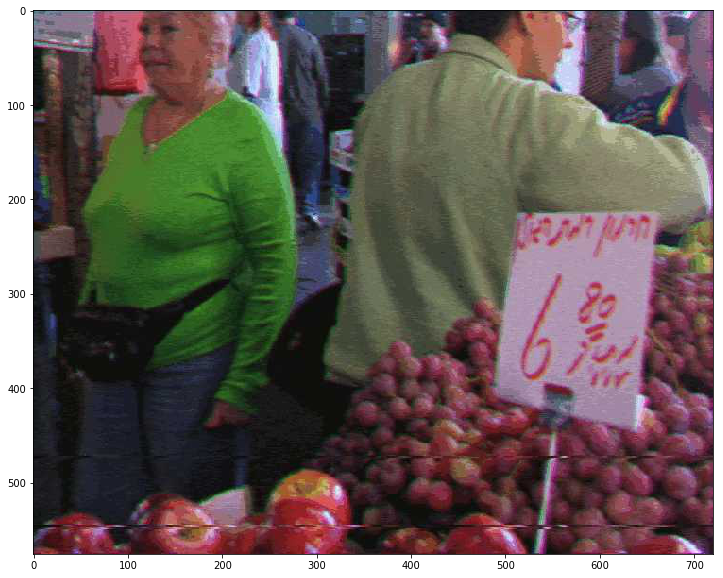

label : 1.0 (0 is clean and 1 is degraded)


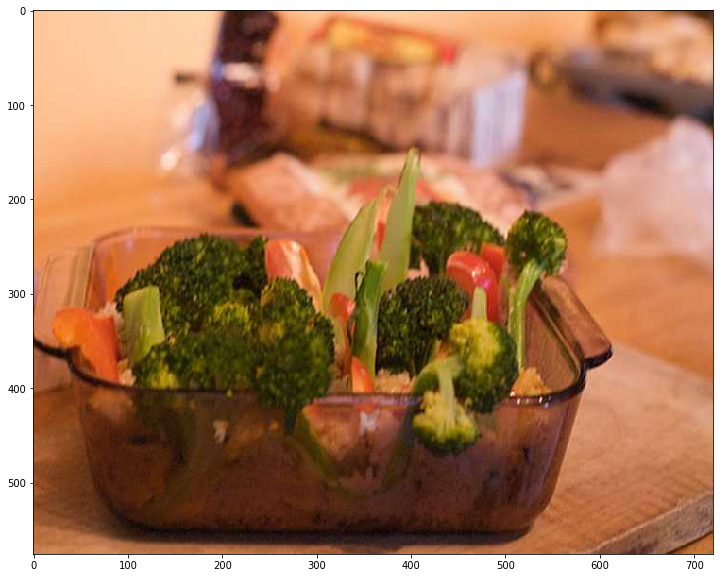

label : 0.0 (0 is clean and 1 is degraded)


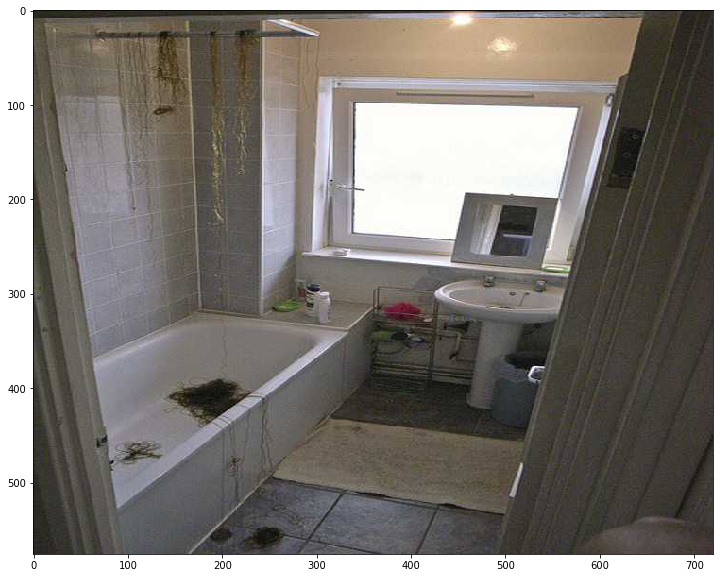

label : 0.0 (0 is clean and 1 is degraded)


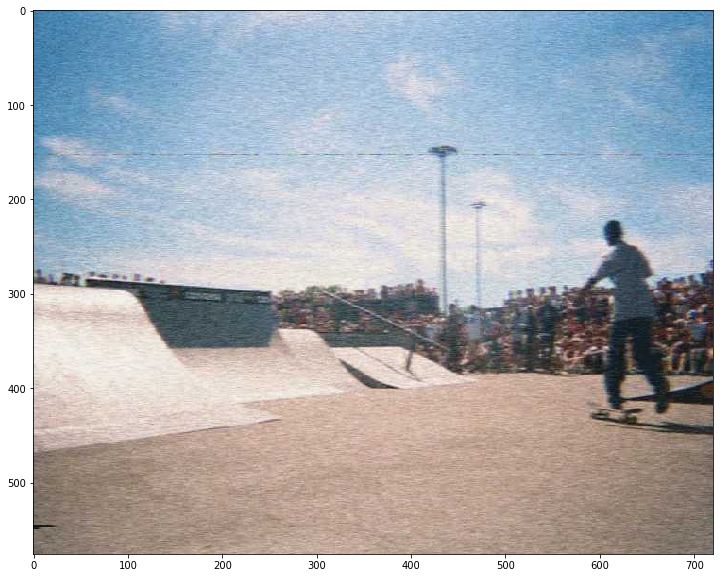

label : 1.0 (0 is clean and 1 is degraded)


In [22]:
#import needed
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as display
import os
from sklearn.model_selection import train_test_split

%matplotlib inline

#degraded and clean dir path
data_dir = '/home/romain/datasets/dataset_clean_degraded/'

#number of images within a dir (5500)
image_count = len(os.listdir(data_dir))

#nb of images loaded within a batch
BATCH_SIZE = 16

#dimension of target image
IMG_HEIGHT = 576
IMG_WIDTH = 720

#used to display images in their true size
dpi = 72
fig_x = IMG_WIDTH / dpi
fig_y =  IMG_HEIGHT / dpi
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

#nb of steps needed to iterate throught the whole dataset
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

#rescale is used to convert int64 pixel values into float ranging from 0 to 1 
img_generator = ImageDataGenerator(rescale=1./255)

#binary dataset
df = pd.read_csv(data_dir+'binary.csv')

X_train, X_test, y_train, y_test = train_test_split(df['X'], df.y, test_size=0.33)
train_df = pd.DataFrame(columns=['X', 'y'])
train_df['X'] = X_train
train_df['y'] = y_train

test_df = pd.DataFrame(columns=['X', 'y'])
test_df['X'] = X_test
test_df['y'] = y_test



#binary training generator 
#TODO : split the df and create a valid and test generator
train_generator = img_generator.flow_from_dataframe(train_df,
                                                    directory=None,
                                                    class_mode='binary',
                                                    x_col = 'X',
                                                    y_col='y',
                                                     batch_size=BATCH_SIZE,
                                                    classes=['clean','degraded'],
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

test_generator = img_generator.flow_from_dataframe(test_df,
                                                    directory=None,
                                                    class_mode='binary',
                                                    x_col = 'X',
                                                    y_col='y',
                                                     batch_size=BATCH_SIZE,
                                                    classes=['clean','degraded'],
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))


X,y = next(train_generator)
#show the 2 firsts images
for i in range(5):
    plt.imshow(X[i])
    plt.show()
    print("label : "+ str(y[i])+" (0 is clean and 1 is degraded)")
#    plt.imshow(y[i])
#    plt.show()

#f, axarr = matplotlib.pyplot.subplots(4,1)

#axarr[0].imshow(X[0])
#axarr[1].imshow(X[1])
#axarr[2].imshow(X[2])
#axarr[3].imshow(X[3])


In [21]:


############
# Encoding #
############

input_img = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size =(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Note:
# padding is a hyper-arameter for either 'valid' or 'same'. 
# "valid" means "no padding". 
# "same" results in padding the input such that the output has the same length as the original input.

############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()


W0120 10:01:20.231981 140474346067776 deprecation_wrapper.py:119] From /home/romain/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0120 10:01:20.290903 140474346067776 deprecation_wrapper.py:119] From /home/romain/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0120 10:01:20.304467 140474346067776 deprecation_wrapper.py:119] From /home/romain/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0120 10:01:20.345832 140474346067776 deprecation_wrapper.py:119] From /home/romain/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0120 1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 576, 720, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 576, 720, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 288, 360, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 288, 360, 8)       1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 144, 180, 8)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 144, 180, 8)       584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 72, 90, 8)         0         
__________

In [8]:
print(next(train_generator)[])

IndexError: tuple index out of range

In [ ]:
autoencoder.fit_generator(train_generator)

W0117 16:00:05.245147 140250503210816 deprecation_wrapper.py:119] From /home/romain/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



In [ ]:
decoded_img = autoencoder.predict(next(X_train_generator)[0])

In [1]:
next(X_train_generator)[0][0]

NameError: name 'X_train_generator' is not defined